# Korean NLP

[Data source](https://play.google.com/store/apps/details?id=com.facebook.katana&hl=ko&gl=US&showAllReviews=true)

[web cralwer](http://localhost:8888/notebooks/Documents/Git/WebCrawler/Google%20App%20Play%20Web%20Scraping.ipynb)

In [422]:
file = r"/Users/reejungkim/Documents/Git/NLP/zigbang/리뷰원본 100/ZIGBANG_review.csv"
target = '직방'

In [423]:
import pandas as pd
import numpy as np
import os
import datetime as dt

import emoji

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import urllib.request

In [424]:
import konlpy

In [425]:
from konlpy.utils import pprint

!pip install soylemma

In [426]:
from soylemma import Lemmatizer

In [427]:
lemmatizer = Lemmatizer()
lemmatizer.analyze('준다는데')

[(('줄', 'Verb'), ('ㄴ다는데', 'Eomi')), (('주', 'Verb'), ('ㄴ다는데', 'Eomi'))]

In [428]:
df = pd.read_csv(file, index_col=None)

In [429]:
df.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,aee911cc-6a5a-4ecb-b6e9-4bc803feebb9,Re JJ,https://play-lh.googleusercontent.com/a/ALm5wu...,30개 중 30개 허위매물,1,0,5.8.11,2022-09-18 15:29:58,먼저 이용자님이 겪으셨을 불편함에 대해서 중개사를 대신해서 사과의 말씀을 드립니다....,2022-09-19 18:21:14
1,1,67133384-bd83-4b20-845a-625f5f06788f,메타범순,https://play-lh.googleusercontent.com/a-/ACNPE...,광고알림이 하루에한번씩옴,1,0,5.8.11,2022-09-18 11:07:52,"먼저, 직방 서비스 이용 중 불편을 드린 점 사과드립니다.\n\n직방 알림 on /...",2022-09-19 18:21:05
2,2,13bf8313-5c77-4d27-aa20-e158445659a0,조다미,https://play-lh.googleusercontent.com/a/ALm5wu...,"ㅣㅣㅣㅣ,,ㅣ핍,ㅍ기ㅣ.,,, ,,ㅣ,,,,,시 ㅣㅣ,!,ㅣ,시.ㅣ ㅣㅣ,ㅍ.ㅂㅣㅣ...",5,0,5.7.9,2022-09-18 08:39:04,"안녕하세요, 이용자님.\n문의해주신 내용에 대해 파악이 어렵습니다.\n좀 더 자세히...",2022-09-19 14:49:49
3,3,d80c1c39-7e23-4003-b320-faad8ee9eb7e,임나연,https://play-lh.googleusercontent.com/a/ALm5wu...,3D단지투어가 안되네요,2,0,5.8.11,2022-09-17 20:41:36,"먼저, 직방 서비스 이용 중 불편을 드린 점 사과드립니다.\n\n현재 사용하시는 직...",2022-09-19 14:49:41
4,4,11242467-2f31-4caf-ac2c-042aae492802,BBaegi,https://play-lh.googleusercontent.com/a/ALm5wu...,방 보고 맘에 들어서갔더니 공인중개사가 세상에 그런방은 없다고 당당하게 허위라면서 ...,1,0,5.8.11,2022-09-17 09:47:20,먼저 이용자님이 겪으셨을 불편함에 대해서 중개사를 대신해서 사과의 말씀을 드립니다....,2022-09-19 14:49:31


# 탐색적 분석 (EDA) 

In [430]:
df.shape

(100, 11)

In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            100 non-null    int64 
 1   reviewId              100 non-null    object
 2   userName              100 non-null    object
 3   userImage             100 non-null    object
 4   content               100 non-null    object
 5   score                 100 non-null    int64 
 6   thumbsUpCount         100 non-null    int64 
 7   reviewCreatedVersion  85 non-null     object
 8   at                    100 non-null    object
 9   replyContent          99 non-null     object
 10  repliedAt             99 non-null     object
dtypes: int64(3), object(8)
memory usage: 8.7+ KB


df['review_date'] = df['review_date'].str.replace('년 ','/').str.replace('월 ', '/').str.replace('일', '/')

In [432]:
df['review_date'] = pd.to_datetime(df['at'])

df['year-m'] = df['review_date'].dt.strftime('%Y-%m')

In [433]:
df.head(2)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review_date
0,0,aee911cc-6a5a-4ecb-b6e9-4bc803feebb9,Re JJ,https://play-lh.googleusercontent.com/a/ALm5wu...,30개 중 30개 허위매물,1,0,5.8.11,2022-09-18 15:29:58,먼저 이용자님이 겪으셨을 불편함에 대해서 중개사를 대신해서 사과의 말씀을 드립니다....,2022-09-19 18:21:14,2022-09-18 15:29:58
1,1,67133384-bd83-4b20-845a-625f5f06788f,메타범순,https://play-lh.googleusercontent.com/a-/ACNPE...,광고알림이 하루에한번씩옴,1,0,5.8.11,2022-09-18 11:07:52,"먼저, 직방 서비스 이용 중 불편을 드린 점 사과드립니다.\n\n직방 알림 on /...",2022-09-19 18:21:05,2022-09-18 11:07:52


In [435]:
import seaborn as sns
sns.set_palette("light:#5A9")

plt.figure(figsize=(5,3))

ax = df.groupby('year-m')['review'].count().plot(kind='bar', color='green')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of reviews added")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(x='at',data=df, hue='star', dodge=False, order=df['at'].sort_values().unique()) 
plt.show()

## 텍스트 정재 Clean texts

### Clean star rating

df['star'] = df['star'].str.replace('별표 5개 만점에 ', '').str.replace('개를 받았습니다.', '')

In [436]:
df['score'] = df['score'].astype(str).astype(int)

In [437]:
df.head(3)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review_date
0,0,aee911cc-6a5a-4ecb-b6e9-4bc803feebb9,Re JJ,https://play-lh.googleusercontent.com/a/ALm5wu...,30개 중 30개 허위매물,1,0,5.8.11,2022-09-18 15:29:58,먼저 이용자님이 겪으셨을 불편함에 대해서 중개사를 대신해서 사과의 말씀을 드립니다....,2022-09-19 18:21:14,2022-09-18 15:29:58
1,1,67133384-bd83-4b20-845a-625f5f06788f,메타범순,https://play-lh.googleusercontent.com/a-/ACNPE...,광고알림이 하루에한번씩옴,1,0,5.8.11,2022-09-18 11:07:52,"먼저, 직방 서비스 이용 중 불편을 드린 점 사과드립니다.\n\n직방 알림 on /...",2022-09-19 18:21:05,2022-09-18 11:07:52
2,2,13bf8313-5c77-4d27-aa20-e158445659a0,조다미,https://play-lh.googleusercontent.com/a/ALm5wu...,"ㅣㅣㅣㅣ,,ㅣ핍,ㅍ기ㅣ.,,, ,,ㅣ,,,,,시 ㅣㅣ,!,ㅣ,시.ㅣ ㅣㅣ,ㅍ.ㅂㅣㅣ...",5,0,5.7.9,2022-09-18 08:39:04,"안녕하세요, 이용자님.\n문의해주신 내용에 대해 파악이 어렵습니다.\n좀 더 자세히...",2022-09-19 14:49:49,2022-09-18 08:39:04


plt.figure(figsize=(5,3))
sns.countplot(x='star',data=df) #,hue='year-m', dodge=False)
plt.show()

In [438]:
count_stars = pd.pivot_table(df, values='content', index=['score'], aggfunc='count') #df.groupby(['star']).size().reset_index(name='counts') 
count_stars

,content
score,
1,36
2,8
3,7
4,11
5,38


In [439]:
pd.pivot_table(df,index='score',values='content',
               aggfunc = lambda x:x.count()/df['content'].count() * 100).astype(str) + '%'

,content
score,
1,36.0%
2,8.0%
3,7.000000000000001%
4,11.0%
5,38.0%


#### star ratings weighted by reviewer ratings
공감을 많이 받은 별점에 무게를 더한 값

In [440]:
count_stars_weighted = pd.pivot_table(df, values='thumbsUpCount', index=['score'], aggfunc=np.sum)
count_stars_weighted

,thumbsUpCount
score,
1,177
2,0
3,0
4,1
5,0


In [441]:
pd.pivot_table(df,index='score',values='thumbsUpCount',
               aggfunc = lambda x:x.sum()/df['thumbsUpCount'].sum()*100).astype(str) + '%'

,thumbsUpCount
score,
1,99.43820224719101%
2,0.0%
3,0.0%
4,0.5617977528089888%
5,0.0%


In [442]:
count_stars

,content
score,
1,36
2,8
3,7
4,11
5,38


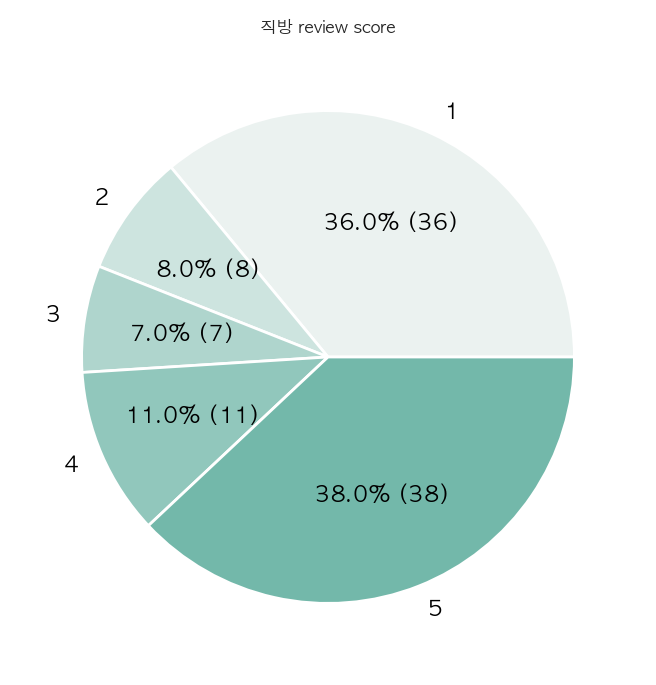

In [443]:
import matplotlib.pyplot as plt
#from palettable.colorbrewer.qualitative import Pastel1_7

plt.figure(figsize=(5,4))
my_circle=plt.Circle((0,0), 0.4, color='white')

textprops={"color":"black","size":8,
"weight":"bold"}  

plt.pie( count_stars.content, 
        labels=count_stars.index, startangle=0,
        #autopct='%.1f%%'
        autopct=lambda p: "{:.1f}% ({:.0f})".format(p, p/100*count_stars.content.sum()),
        textprops=textprops
        ) #,colors=Pastel1_7.hex_colors)

#p=plt.gcf()


plt.title(target + ' review score')
plt.savefig(target+"_review_score.png")
plt.show()


공감을 가장 많이 얻은 리뷰 Top10

In [444]:
df[['content', 'thumbsUpCount', 'score']].sort_values(by='thumbsUpCount', ascending=False)[:10].to_csv('호갱_공감많은순_탑10.csv')

df.loc[df.reviewer_ratings.isnull()]

### 이모티콘 추출 Extract emojis

In [155]:
df.content

0     성산동 20-17 공업사가 아니라 빌라입니다. 유진하이츠궁 이라는 이름이 있는 빌라...
1     앱 자체가 안열리는데 어떻게 해야하나요? 지우고 새로 설치해도 파란 화면만 나오네요...
2     아파트실거래 잘 이용하고 있습니다 핸드폰을 바꾼 이후로 어플 들어갔더니 즐겨찾는 단...
3                            왜 요즘 자꾸 튕기고 안정성이 떨어지는것 같죠?
4                                      제발 뒤로가기 바로종료좀...
                            ...                        
95                            거상쌤의 좋은 성격,선한 영향력 본받겠습니다.
96                                   경매정보,등기부열람까지 가능하네요
97                     어플 괜찮은 데 갑자기 이상해지네요 왜케 반응이 느림 ??
98                    잘모르는 사람도 전문가처럼 분석하며 찾아볼수있어서 조아욤 ㅎ
99                                            부동산앱의 최고봉
Name: content, Length: 100, dtype: object

In [157]:
def extract_emojis(string):
    emoticon = "".join(c for c in string if c in emoji.UNICODE_EMOJI)
    if emoticon!="":
        return emoticon
    return None

In [158]:
df['emoji']=df['content'].apply(lambda x: extract_emojis(x))

In [159]:
df.emoji.head()

0    None
1    None
2    None
3    None
4    None
Name: emoji, dtype: object

In [160]:
df[['content','emoji', 'score']].loc[df.emoji.notnull()]

,content,emoji,score


### 명사 추출 (Extract nouns)

kkma과 okt의 다른점

Okt는 Kkma에 비해 비교적 빠른 속도로 처리하지만 지원하는 품사 태그가 적다. 
속도가 중요할 때는 Okt를, 정확한 품사 정보가 필요할 때는 Kkma를 많이 사용.


http://kkma.snu.ac.kr/documents/?doc=postag

In [161]:
from konlpy.tag import Kkma
kkma = Kkma()

from konlpy.tag import Okt
okt = Okt()

print('kkma 사용: {}'.format(kkma.nouns("로그인이 안돼요")))
print('okt 사용: {}'.format(okt.nouns("로그인이 안돼요")))

kkma 사용: ['로그', '로그인', '인']
okt 사용: ['로그인']


In [162]:

from konlpy.tag import Kkma #Twitter

for word in ['했다', '했지만', '하면서도', '했던', '하니까']:
    print(kkma.pos(word))

[('하', 'VV'), ('었', 'EPT'), ('다', 'EFN')]
[('하', 'VV'), ('었', 'EPT'), ('지만', 'ECE')]
[('하면서', 'NNG'), ('도', 'JX')]
[('하', 'VV'), ('었', 'EPT'), ('던', 'EFQ')]
[('하', 'VV'), ('니까', 'ECD')]


In [445]:
df['nouns'] = df['content'].apply(lambda x: okt.nouns(x))

In [446]:
df.head(3)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review_date,nouns
0,0,aee911cc-6a5a-4ecb-b6e9-4bc803feebb9,Re JJ,https://play-lh.googleusercontent.com/a/ALm5wu...,30개 중 30개 허위매물,1,0,5.8.11,2022-09-18 15:29:58,먼저 이용자님이 겪으셨을 불편함에 대해서 중개사를 대신해서 사과의 말씀을 드립니다....,2022-09-19 18:21:14,2022-09-18 15:29:58,"[개, 중, 개, 허위, 매물]"
1,1,67133384-bd83-4b20-845a-625f5f06788f,메타범순,https://play-lh.googleusercontent.com/a-/ACNPE...,광고알림이 하루에한번씩옴,1,0,5.8.11,2022-09-18 11:07:52,"먼저, 직방 서비스 이용 중 불편을 드린 점 사과드립니다.\n\n직방 알림 on /...",2022-09-19 18:21:05,2022-09-18 11:07:52,"[광고알림, 하루, 한번, 옴]"
2,2,13bf8313-5c77-4d27-aa20-e158445659a0,조다미,https://play-lh.googleusercontent.com/a/ALm5wu...,"ㅣㅣㅣㅣ,,ㅣ핍,ㅍ기ㅣ.,,, ,,ㅣ,,,,,시 ㅣㅣ,!,ㅣ,시.ㅣ ㅣㅣ,ㅍ.ㅂㅣㅣ...",5,0,5.7.9,2022-09-18 08:39:04,"안녕하세요, 이용자님.\n문의해주신 내용에 대해 파악이 어렵습니다.\n좀 더 자세히...",2022-09-19 14:49:49,2022-09-18 08:39:04,"[기, 시, 시, 비, 픽, 니, 시, 빞]"


In [165]:
df.nouns.isnull().sum()

0

### 불용어 정리 Remove Stopwords

In [447]:
stopwords = ['덕분', '안', '중','때문', '짓', '이것', '하', '거', '식', '시', '앱', '뭐', '데','나', '개','페', '주세',
             '이거', '일', '업', '북', '인', '구', '저', '해','해보고','대','여', '페북', '페이스북', '페이스', '수', 
             '전', '제가','제','것','이것' , '좀', '왜','어째서', '재', '때', '계속', '후', '다시', '요','를', '을', 
             '무슨','못','사', '진짜', '제발','비', '자꾸', '츠궁']

In [448]:
with open('/Users/reejungkim/Documents/Git/NLP/한국어불용어100.txt') as f:
    lines = f.readlines()
    result=[]
    for x in lines:
        result.append(x.split('\t')[0])
    f.close()


In [449]:
stopwords = stopwords + result

In [450]:
def removeStopWords(Noun_words):
    unique_Noun_words = set(Noun_words)
    for word in unique_Noun_words:
        if word in stopwords:
            while word in Noun_words: 
                Noun_words.remove(word) 
    return Noun_words

In [451]:
df['nouns'] = df['nouns'].apply(lambda x: removeStopWords(x))

In [452]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

### 리뷰 분류 classify reviews


3,4,5 의 점수는 긍정리뷰

1 또는 2의 점수는 부정적리뷰

In [453]:
df_positive_review = df.loc[df.score>=3]

In [454]:
df_negative_review = df.loc[df.score<=2]

### Counter

In [455]:
from collections import Counter

In [456]:
#카운터 쓰임예제
c = Counter(df.nouns[0])
print(c.most_common(10))

[('허위', 1), ('매물', 1)]


In [457]:
def common_words(df, col, n):
    counts = Counter([item for sublist in df[col] for item in sublist])
    common_words = pd.DataFrame(counts.most_common(n))
    common_words.columns =['Word','count']
    return common_words

In [458]:
common_review = common_words(df, 'nouns', 50)

In [459]:
common_positive_review = common_words(df_positive_review, 'nouns', 50)

In [460]:
common_negative_review = common_words(df_negative_review, 'nouns', 50)

In [462]:
common_negative_review.to_excel(target+'_negative_reviews.xlsx')

In [463]:
common_positive_review.to_excel(target+'_positive_reviews.xlsx')

In [464]:
count_stars.to_excel(target+'_hogang_review_score.xlsx')

In [326]:
#%%bash
#wget http://cdn.naver.com/naver/NanumFont/fontfiles/NanumFont_TTF_ALL.zip
#unzip NanumFont_TTF_ALL.zip -d NanumFont
#ls -al

In [465]:
import matplotlib
#matplotlib.matplotlib_fname()

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
#print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))

font_location = '/Users/reejungkim/Documents/나눔 글꼴/나눔고딕/NanumFontSetup_OTF_GOTHIC/NanumGothic.otf'  #font 경로 설정
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [372]:
# 폰트 설정 방법 1
import matplotlib.pyplot as plt

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='Nanum Malgun Gothic') # For Windows
print(plt.rcParams['font.family'])

fontprop = fm.FontProperties(fname='/Users/reejungkim/Documents/나눔 글꼴/나눔고딕/NanumFontSetup_OTF_GOTHIC/NanumGothic.otf', size=18)

['Nanum Malgun Gothic']


findfont: Font family ['NanumGothicOTF'] not found. Falling back to DejaVu Sans.


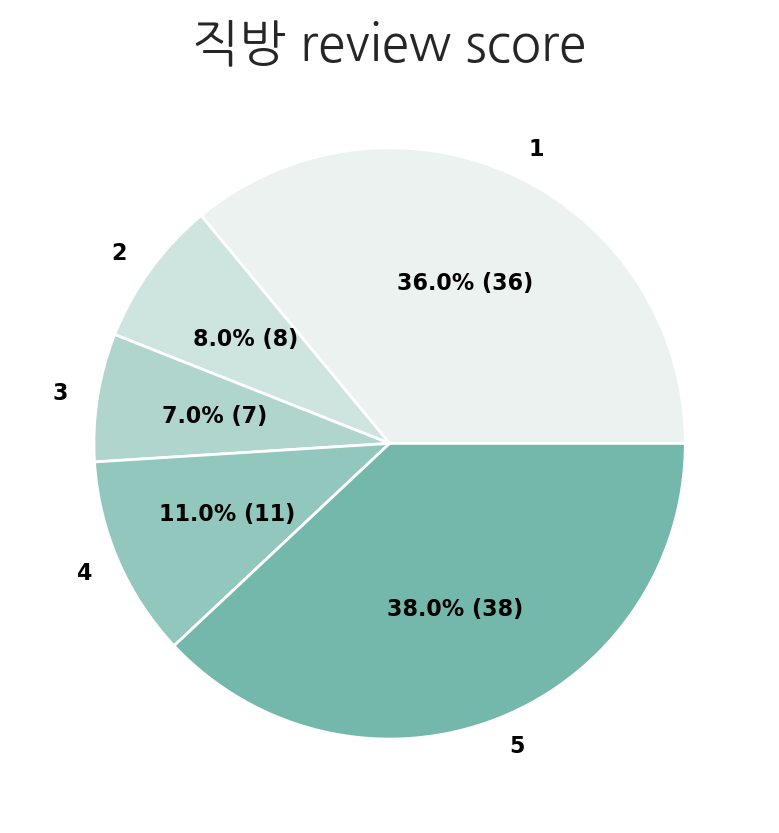

In [466]:
# fname 옵션을 사용하는 방법
path = '/Users/reejungkim/Documents/나눔 글꼴/나눔고딕/NanumFontSetup_OTF_GOTHIC/NanumGothic.otf'
fontprop = fm.FontProperties(fname=path, size=18)

plt.pie( count_stars.content, 
        labels=count_stars.index, startangle=0,
        #autopct='%.1f%%'
        autopct=lambda p: "{:.1f}% ({:.0f})".format(p, p/100*count_stars.content.sum()),
        textprops=textprops
        ) #,colors=Pastel1_7.hex_colors)

#p=plt.gcf()


plt.title(target + ' review score', fontproperties=fontprop)
plt.savefig(target+"_review_score.png")
plt.show()

In [469]:

        
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 5

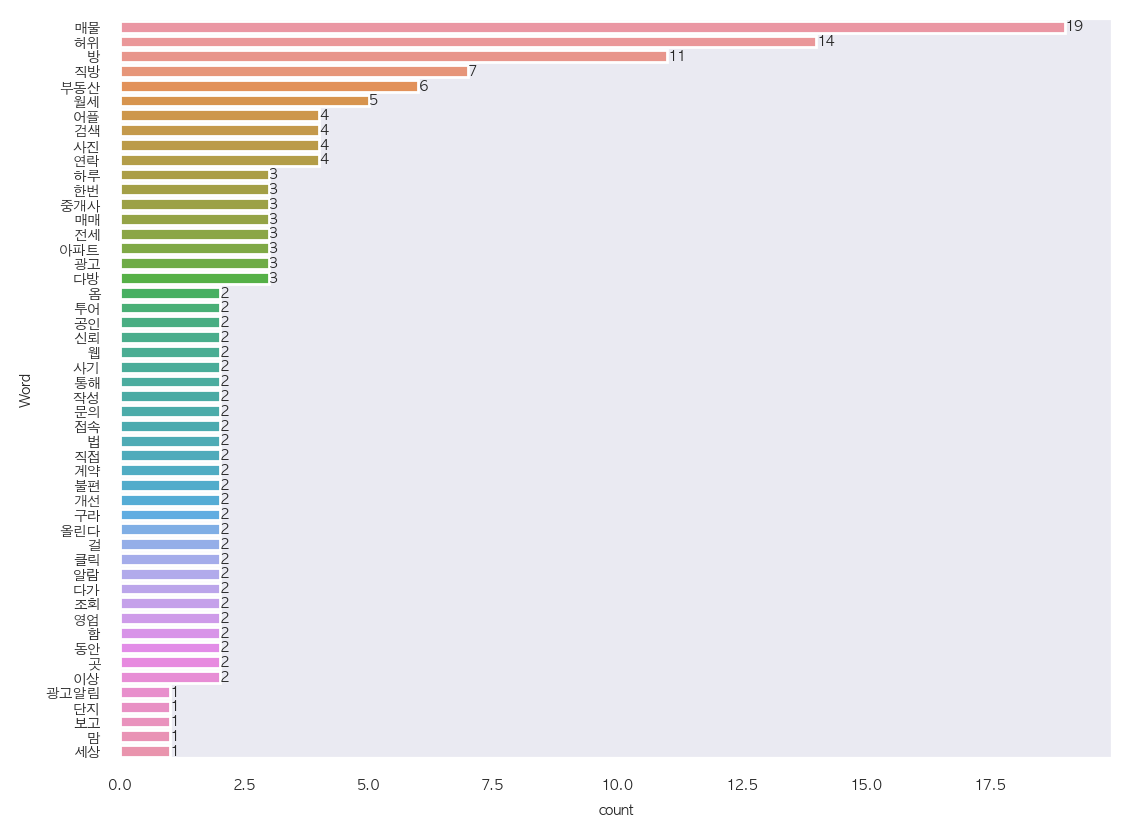

In [470]:

ax = sns.barplot(data=common_negative_review, y='Word', x='count' , ci=None)# fname 옵션을 사용하는 방법

for i in ax.containers:
    ax.bar_label(i,)
plt.savefig(target+"_부정리뷰키워드.png")



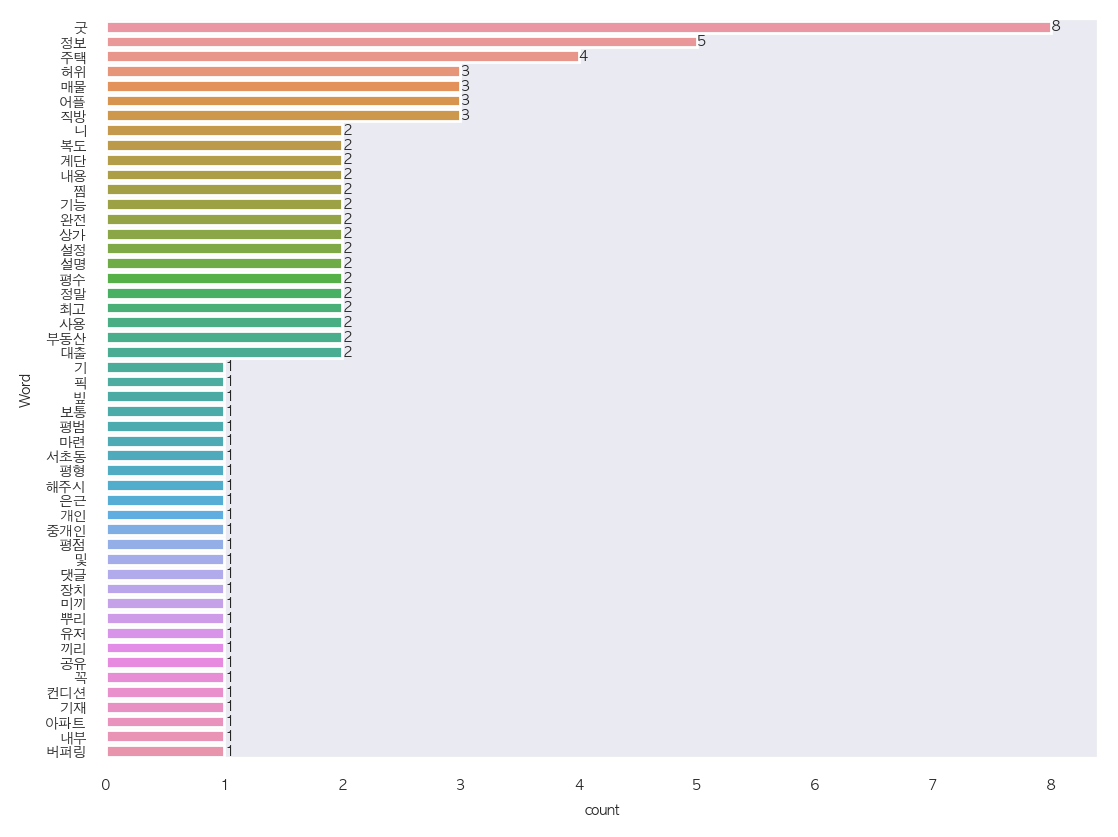

In [471]:

ax = sns.barplot(data=common_positive_review, y='Word', x='count' , ci=None)# fname 옵션을 사용하는 방법

for i in ax.containers:
    ax.bar_label(i,)
plt.savefig(target+"_긍정리뷰키워드.png")

In [245]:
def getCounter(row):
    return dict(Counter(row['nouns']))#.most_common

In [246]:
df['counter']= df.apply(lambda row : getCounter(row), axis=1)

#### Counter without weight

In [247]:
df.counter

0                                                    {}
1     {'분양': 2, '정보': 2, '동의': 1, '알람': 1, '사무소': 1,...
2     {'호갱': 2, '노노': 1, '드': 1, '융자': 1, '때매': 1, '...
3     {'아파트': 1, '리뷰': 1, '뭘잘못눌럿는': 1, '작성': 1, '이전'...
4                                              {'굿': 1}
                            ...                        
95    {'가격': 1, '보기': 2, '위성사진': 1, '설정': 1, '어플': 1...
96    {'아파트': 1, '이야기': 2, '리': 1, '모델링': 1, '언급': 1...
97         {'사진': 1, '운영': 1, '정책': 1, '위반': 1, '뭘': 1}
98                                  {'아이폰': 1, '프로': 1}
99                                            {'쵝오': 1}
Name: counter, Length: 100, dtype: object

def getWeightedCounter(row):
    for key, value in row['counter'].items():
        newvalue = value*row['reviewer_ratings'] + 1
        row['counter'][key] = newvalue

df.apply(lambda row : getWeightedCounter(row), axis=1)

#### Counter weighted by reviewer ratings (likes on the review)

In [183]:
df.counter

0     {'성산동': 1, '공업': 1, '사가': 1, '빌라': 2, '유진': 1,...
1         {'자체': 1, '설치': 1, '파란': 1, '화면': 1, '다해': 1}
2     {'아파트': 1, '실': 1, '거래': 1, '이용': 1, '핸드폰': 1,...
3                           {'요즘': 1, '튕기': 1, '안정': 1}
4                   {'뒤': 1, '가기': 1, '바로': 1, '종료': 1}
                            ...                        
95                 {'거상': 1, '쌤': 1, '성격': 1, '영향력': 1}
96                {'경매': 1, '정보': 1, '등기부': 1, '열람': 1}
97                {'어플': 1, '갑자기': 1, '왜케': 1, '반응': 1}
98                        {'전문가': 1, '분석': 1, '조아욤': 1}
99                                 {'부동산': 1, '최고봉': 1}
Name: counter, Length: 100, dtype: object

## Visualization

In [248]:
import plotly.express as px

px.treemap(common_review, 
           path=['Word'], values='count',
           title='Most commonly used words',
          width=400, height=400)

In [249]:
fig = px.treemap(common_negative_review, 
           path=['Word'], values='count',
           title='Negative reviews',
          width=400, height=400)

fig.write_html("NegativeReviewsTreeMap_hogang.html")

fig.show()

In [186]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [187]:
FONT_PATH = '/Users/reejungkim/Documents/Git/NLP/Korean font ttf/BMHANNA_11yrs_ttf.ttf'

words = common_review.set_index("Word")['count'].to_dict()

In [250]:
wc = WordCloud(background_color='white',width=800, height=400, font_path=FONT_PATH)

## negative reviews

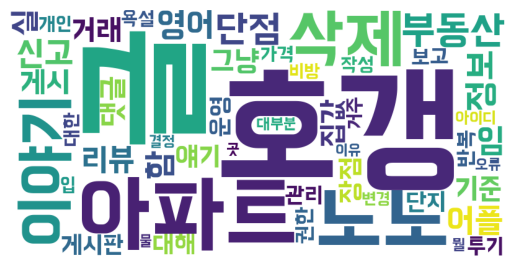

In [251]:
negative_words =common_negative_review.set_index("Word")['count'].to_dict()
wordcloud = wc.generate_from_frequencies(negative_words)
plt.imshow(wordcloud)
plt.savefig(target + " 부정리뷰WC.png")
plt.axis('off')
plt.show()


In [190]:
common_negative_review.Word.values

array(['빌라', '요즘', '설치', '화면', '실행', '업데이트', '학군', '리스트', '아파트', '입',
       '성산동', '공업', '사가', '유진', '이름', '튕기', '안정', '홈', '텝', '거래', '초기',
       '파란', '리지', '해도', '읍니', '선택', '해당', '학교', '좌표', '이동', '검색', '네이버',
       '도로', '기획', '하자', '서울', '주물', '량', '가요', '만세', '대도', '공급', '정상',
       '공급물량', '포항', '주가', '개도', '표시', '데이터', '신뢰'], dtype=object)

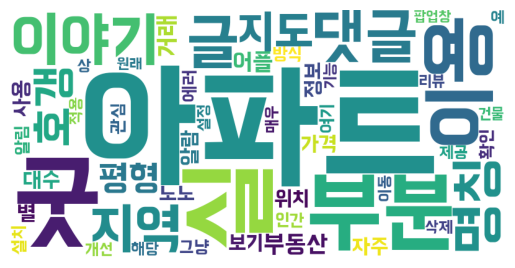

In [252]:
positive_words =common_positive_review.set_index("Word")['count'].to_dict()
wordcloud = wc.generate_from_frequencies(positive_words)
plt.imshow(wordcloud)
plt.savefig("PositiveReviewsWC_hogang.png")
plt.axis('off')
plt.show()

common_negative_review.reset_index(drop=True).values

import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_name = fm.FontProperties(fname=FONT_PATH).get_name()
plt.rc('font', family=font_name)

plt.bar(common_negative_review.Word.values, range(len( common_negative_review)))

common_negative_review.set_index('Word').sort_values(
    by='count', ascending=True).plot(kind='barh') 
